In [1]:
import os
import errno
import random
import shutil
import zipfile
import skimage.io as io

import numpy as np
from tensorflow.python import keras

from deepcell.utils.data_utils import make_training_data
from deepcell.utils.data_utils import get_data
from deepcell.utils.io_utils import get_image_sizes
from deepcell.utils.export_utils import export_model
from deepcell.utils.train_utils import rate_scheduler
from deepcell.model_zoo import bn_feature_net_2D
from deepcell.model_zoo import bn_feature_net_skip_2D
from deepcell.training import train_model_sample
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/deepcell/utils/__init__.py:49: UserWarning: To use `compute_overlap`, the C extensions must be built using `python setup.py build_ext --inplace`
  warnings.warn('To use `compute_overlap`, the C extensions must be built '


In [2]:
CHANNEL_AXIS = 3
training_data = np.load(os.path.join('/data/npz_data', 
                                     "Point1_12_18_23_20190606_output_3_class_w_watershed" + ".npz"))

X, y = training_data["X"], training_data["y"]
print("X.shape: {} & y.shape: {}".format(X.shape, y.shape))


X.shape: (4, 1024, 1024, 3) & y.shape: (4, 1024, 1024, 1)


In [3]:
hist = np.load('/data/models/20190621_postprocessing/Point1_12_18_20190606_output_3_class_w_watershed.npz')

In [4]:
hist['loss_history'].tolist()['acc']
hist['loss_history']

array({'acc': [0.7843156418552283, 0.8014612459565412, 0.8100118872543677, 0.8134348712511656, 0.8170135487426157, 0.8189045996624792, 0.8209297515488707, 0.8221355238009196, 0.8238799728156011, 0.8247800403205285, 0.825672152684585, 0.8274200110465539, 0.8284950916777367, 0.8302997724830717, 0.8311373352994701, 0.8325703973255248, 0.8342193846359368, 0.8348421586168481, 0.8361854411800029, 0.8364127309550926, 0.838554937075097, 0.8395447840398084, 0.8409187507239443, 0.8421165678328192, 0.8441030804576297, 0.843979207530932, 0.8453724938466712, 0.8474544681752094, 0.8480681505648896, 0.8486284198583557, 0.8504183268285157, 0.8516581925466655, 0.85194571410997, 0.8537492584675187, 0.8541140585535787, 0.8550152625087309, 0.856114208564965, 0.8571154200193251, 0.858158680082147, 0.8587700895739516], 'loss': [0.43365396583010957, 0.4036599811137931, 0.38987376793227035, 0.38359161821046184, 0.37820586715115023, 0.3740267644865919, 0.370692370779087, 0.36779579918333133, 0.3652476660979866

In [16]:
MODEL_NAME = 'Point1_12_18_20190606_output_' + '3_class_w_watershed_epoch_40'
weights_path = os.path.join('/data/models/20190621_postprocessing', 
                            MODEL_NAME + ".h5")

In [17]:
# Load the previously generated weights
# from deepcell import model_zoo

run_sample_model = bn_feature_net_2D(
    n_dense_filters=128,
    n_conv_filters=64,
    dilated=True,
    n_features=3,
    norm_method='std',
    receptive_field=61,
    n_channels=3,    
    input_shape=tuple(X.shape[1:]))

run_sample_model.load_weights(weights_path)

In [18]:
test_images_2 = run_sample_model.predict(X[:, :, :, :])

print('model output shape:', test_images.shape)

model output shape: (4, 1024, 1024, 3)


In [21]:
np.save('/data/models/20190621_postprocessing/' + MODEL_NAME + '_metrics', test_images)


In [26]:
test_images_2 = np.load('/data/models/20190621_postprocessing/' + 'Point1_12_18_20190606_output_3_class_w_interior_and_watershed_epoch_20_metrics.npy')

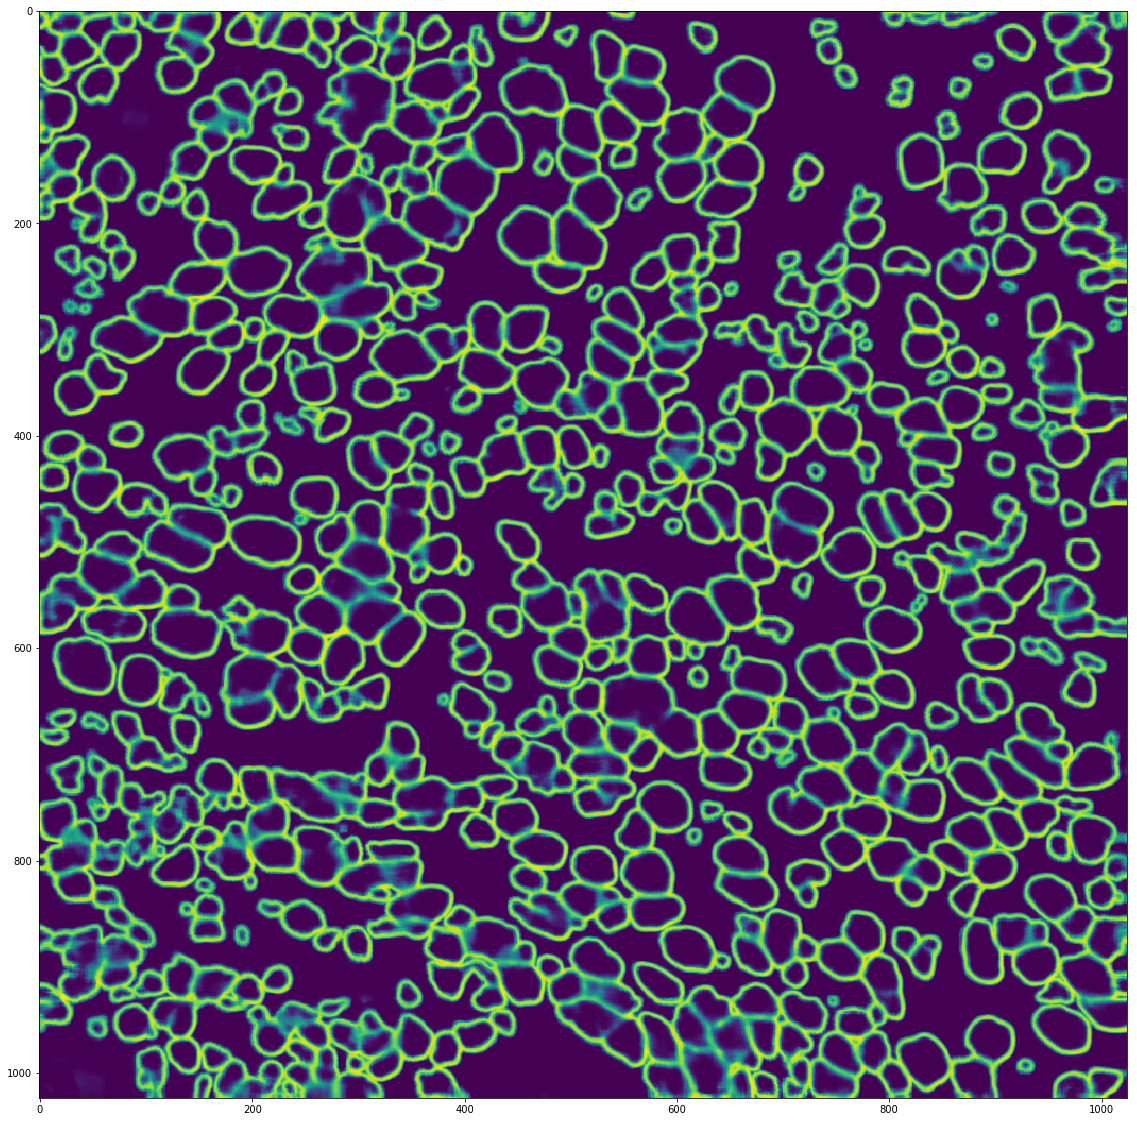

In [25]:
plt.figure(figsize = (20, 20))
# plt.imshow(test_images[2, :, :, 3] - test_2[2, :, :, 3])
# plt.colorbar()
#plt.imshow(test_images_2[3, :, :, 0])
plt.imshow(test_images[3, :, :, 0])
#plt.imshow(test_images[3, :, :, 0] - 2 * test_images_2[3, :, :, 0])



In [ ]:
# import copy
# test_2 = copy.copy(test_images)
test_2 = np.load('/data/models/' + 'Point1_12_18_3X_interior_save_10' + '_metrics.npy')